# 1. Data imports & data cleaning 

### Importing the data

In [81]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
feature_data = cdc_diabetes_health_indicators.data.features 
target_data = cdc_diabetes_health_indicators.data.targets 


In [82]:
# metadata 
cdc_diabetes_health_indicators.metadata

{'uci_id': 891,
 'name': 'CDC Diabetes Health Indicators',
 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators',
 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv',
 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Tabular', 'Multivariate'],
 'num_instances': 253680,
 'num_features': 21,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Sex', 'Age', 'Education Level', 'Income'],
 'target_col': ['Diabetes_binary'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol

In [83]:
# variable information 
variable_info = cdc_diabetes_health_indicators.variables
variable_info

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Patient ID,None,no
1,Diabetes_binary,Target,Binary,None,0 = no diabetes 1 = prediabetes or diabetes,None,no
2,HighBP,Feature,Binary,None,0 = no high BP 1 = high BP,None,no
3,HighChol,Feature,Binary,None,0 = no high cholesterol 1 = high cholesterol,None,no
4,CholCheck,Feature,Binary,None,0 = no cholesterol check in 5 years 1 = yes ch...,None,no
5,BMI,Feature,Integer,None,Body Mass Index,None,no
6,Smoker,Feature,Binary,None,Have you smoked at least 100 cigarettes in you...,None,no
7,Stroke,Feature,Binary,None,(Ever told) you had a stroke. 0 = no 1 = yes,None,no
8,HeartDiseaseorAttack,Feature,Binary,None,coronary heart disease (CHD) or myocardial inf...,None,no
9,PhysActivity,Feature,Binary,None,physical activity in past 30 days - not includ...,None,no


# 2. Summary statistics 

### Exploring the data

In [84]:
# view the first few rows of the data
feature_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [85]:
feature_data.describe(include='all')

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [86]:
feature_data.dtypes

HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object

In [87]:
sensitive_attributes = ['Sex', 'Age', 'Education', 'Income']

variable_info[variable_info['name'].isin(sensitive_attributes)]

,name,role,type,demographic,description,units,missing_values
19,Sex,Feature,Binary,Sex,0 = female 1 = male,None,no
20,Age,Feature,Integer,Age,13-level age category (_AGEG5YR see codebook) ...,None,no
21,Education,Feature,Integer,Education Level,Education level (EDUCA see codebook) scale 1-6...,None,no
22,Income,Feature,Integer,Income,Income scale (INCOME2 see codebook) scale 1-8 ...,None,no


In [88]:
# Variable Detailed Description from Codebook
# source: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf

Sex_desc = {
    0: 'Female',
    1: 'Male'
}

Age_desc = {
    1: 'Age 18 to 24', 
    2: 'Age 25 to 29',
    3: 'Age 30 to 34', 
    4: 'Age 35 to 39',
    5: 'Age 40 to 44', 
    6: 'Age 45 to 49',
    7: 'Age 50 to 54', 
    8: 'Age 55 to 59',
    9: 'Age 60 to 64', 
    10: 'Age 65 to 69',
    11: 'Age 70 to 74', 
    12: 'Age 75 to 79',
    13: 'Age 80 or older'
    }

Education_desc = {
    1: 'Never attended school or only kindergarten',
    2: 'Grades 1 through 8 (Elementary)',
    3: 'Grades 9 through 11 (Some high school)',
    4: 'Grade 12 or GED (High school graduate)',
    5: 'College 1 year to 3 years (Some college or technical school)',
    6: 'College 4 years or more (College graduate)'
}

Income_desc = {
    1: 'Less than $10,000',
    2: 'Less than $15,000 ($10,000 to less than $15,000)',
    3: 'Less than $20,000 ($15,000 to less than $20,000)',
    4: 'Less than $25,000 ($20,000 to less than $25,000)',
    5: 'Less than $35,000 ($25,000 to less than $35,000)',
    6: 'Less than $50,000 ($35,000 to less than $50,000)',
    7: 'Less than $75,000 ($50,000 to less than $75,000)',
    8: '$75,000 or more',
}

### a. How many rows & columns of data do you have, both overall, and per sensitive attribute subgroup?

In [89]:
# How many rows & columns of data do you have, both overall, and per sensitive attribute subgroup?

rows, columns = feature_data.shape
print(f'There are {rows} rows and {columns} columns in the dataset')

for att in sensitive_attributes:
    print(f'\n{att} Variable:')
    
    n_subgroups = feature_data[att].nunique()
    desc_dict_name = att + '_desc'
    if att=='Sex':
        first_val = 0
    else:
        first_val = 1

    for subgroup in range(first_val, n_subgroups + first_val):

        subgroup_name = eval(desc_dict_name)[subgroup]
        print(f'  {subgroup} ({subgroup_name}): {len(feature_data[feature_data[att] == subgroup])} rows')
    

There are 253680 rows and 21 columns in the dataset

Sex Variable:
  0 (Female): 141974 rows
  1 (Male): 111706 rows

Age Variable:
  1 (Age 18 to 24): 5700 rows
  2 (Age 25 to 29): 7598 rows
  3 (Age 30 to 34): 11123 rows
  4 (Age 35 to 39): 13823 rows
  5 (Age 40 to 44): 16157 rows
  6 (Age 45 to 49): 19819 rows
  7 (Age 50 to 54): 26314 rows
  8 (Age 55 to 59): 30832 rows
  9 (Age 60 to 64): 33244 rows
  10 (Age 65 to 69): 32194 rows
  11 (Age 70 to 74): 23533 rows
  12 (Age 75 to 79): 15980 rows
  13 (Age 80 or older): 17363 rows

Education Variable:
  1 (Never attended school or only kindergarten): 174 rows
  2 (Grades 1 through 8 (Elementary)): 4043 rows
  3 (Grades 9 through 11 (Some high school)): 9478 rows
  4 (Grade 12 or GED (High school graduate)): 62750 rows
  5 (College 1 year to 3 years (Some college or technical school)): 69910 rows
  6 (College 4 years or more (College graduate)): 107325 rows

Income Variable:
  1 (Less than $10,000): 9811 rows
  2 (Less than $15,000 (

### b. What are your outcome variables of interest?
> Our outcome variable is called *"Diabetes_binary"* and is stored in target_data


In [90]:
# What mean / median / standard deviation values do the outcome variables have overall?

target_data.describe()

,Diabetes_binary
count,253680.000000
mean,0.139333
std,0.346294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [91]:
# What about these statistics within each relevant sensitive attribute subgroup?

# merging target and feature data
merged_data = feature_data.copy()
merged_data['Diabetes_binary'] = target_data

for att in sensitive_attributes:
    print(f'\n{att} Variable:')
    
    n_subgroups = merged_data[att].nunique()
    desc_dict_name = att + '_desc'
    if att=='Sex':
        first_val = 0
    else:
        first_val = 1

    for subgroup in range(first_val, n_subgroups + first_val):

        subgroup_name = eval(desc_dict_name)[subgroup]
        subgroup_diabetes_percent = merged_data[merged_data[att] == subgroup]['Diabetes_binary'].mean()
        print(f'\t{subgroup} ({subgroup_name}): \t{subgroup_diabetes_percent:.2%} have diabetes')



Sex Variable:
	0 (Female): 	12.97% have diabetes
	1 (Male): 	15.16% have diabetes

Age Variable:
	1 (Age 18 to 24): 	1.37% have diabetes
	2 (Age 25 to 29): 	1.84% have diabetes
	3 (Age 30 to 34): 	2.82% have diabetes
	4 (Age 35 to 39): 	4.53% have diabetes
	5 (Age 40 to 44): 	6.50% have diabetes
	6 (Age 45 to 49): 	8.79% have diabetes
	7 (Age 50 to 54): 	11.74% have diabetes
	8 (Age 55 to 59): 	13.83% have diabetes
	9 (Age 60 to 64): 	17.25% have diabetes
	10 (Age 65 to 69): 	20.37% have diabetes
	11 (Age 70 to 74): 	21.85% have diabetes
	12 (Age 75 to 79): 	21.30% have diabetes
	13 (Age 80 or older): 	18.48% have diabetes

Education Variable:
	1 (Never attended school or only kindergarten): 	27.01% have diabetes
	2 (Grades 1 through 8 (Elementary)): 	29.26% have diabetes
	3 (Grades 9 through 11 (Some high school)): 	24.22% have diabetes
	4 (Grade 12 or GED (High school graduate)): 	17.64% have diabetes
	5 (College 1 year to 3 years (Some college or technical school)): 	14.81% have di

### c. Plot at least as many figures as your # group members, and explain concisely but meaningfully what the plot shows in markdown text 

In [92]:
# helper function to plot a varible distribution

import matplotlib.pyplot as plt
import seaborn as sns

def plot_dist(data, col, labels):
    sns.countplot(x=col, data=data, 
                  stat="percent", palette=['lightcoral','skyblue'])
    if labels:
        plt.xticks(ticks=[0,1], labels=labels.values())
        plt.xlabel('')


#### Relative Distribution of Binary Variables

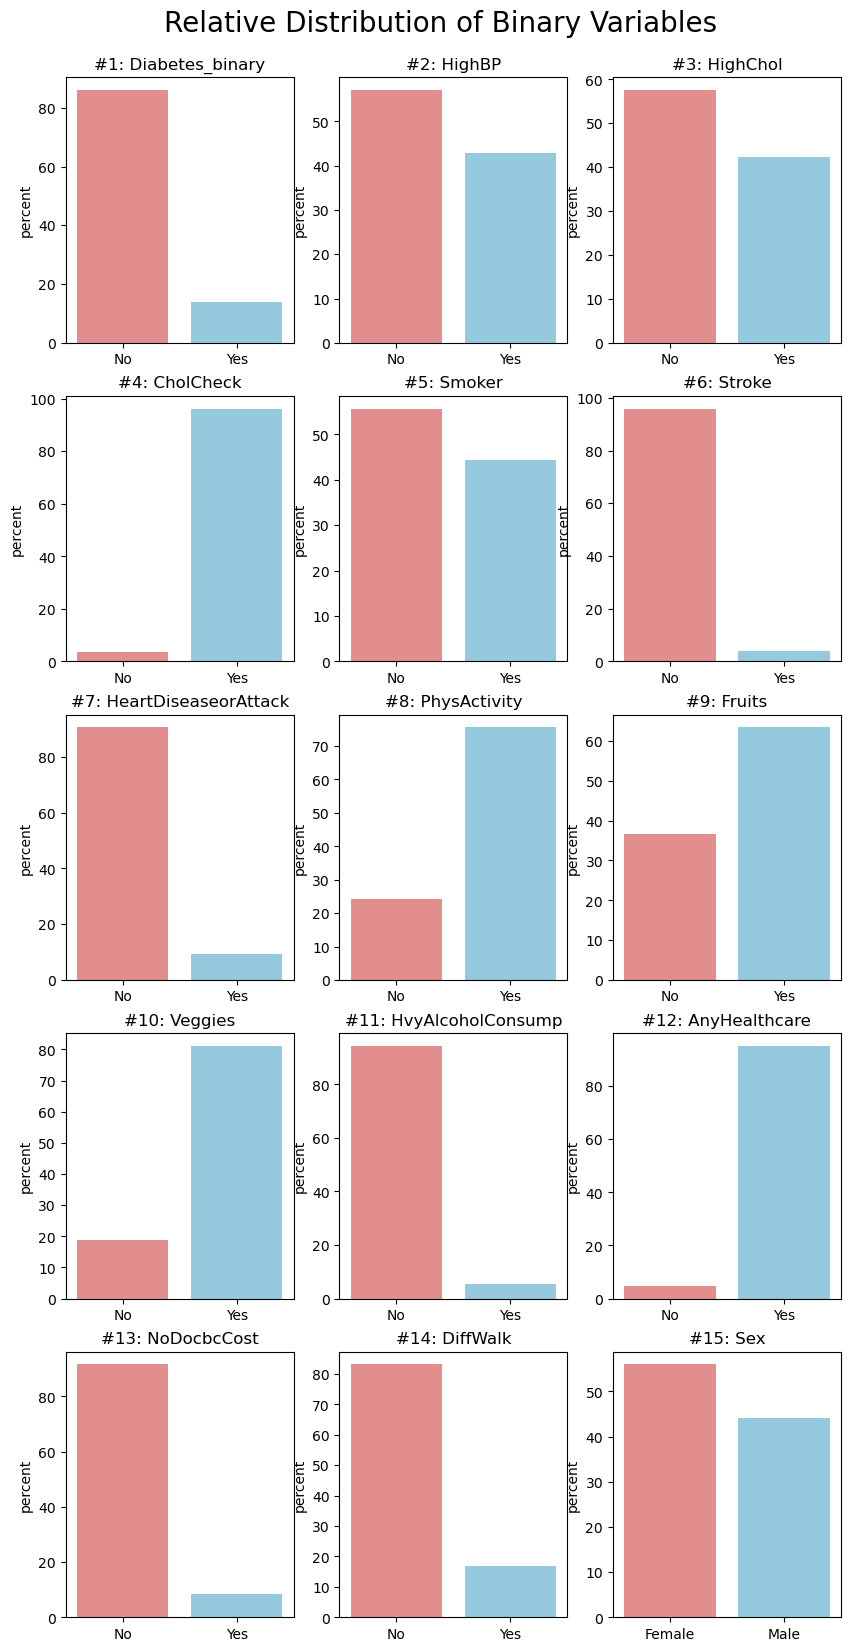

In [93]:
# hiding warnings
import warnings
warnings.filterwarnings('ignore')

# setting up multi plot
fig = plt.figure(figsize=(10,20))
plt.suptitle('Relative Distribution of Binary Variables', 
             va='bottom', y=0.9, fontsize=20)
fig_count = 1

# plotting target variable
col = 'Diabetes_binary'
x_labels = {0:'No',1:'Yes'}

plt.subplot(5, 3, fig_count)
plt.title("#"+str(fig_count)+": "+col)
plot_dist(target_data, col, x_labels)

# plotting binary features (14 out of 21)
binary_features = feature_data.columns[feature_data.nunique() == 2]

for col in binary_features:
    fig_count += 1

    if col == 'Sex':
        x_labels = {0:'Female',1:'Male'}

    plt.subplot(5, 3, fig_count)
    plt.title("#"+str(fig_count)+": "+col)
    plot_dist(feature_data, col, x_labels)

plt.show()


#### Relative Distribution of Other Variables

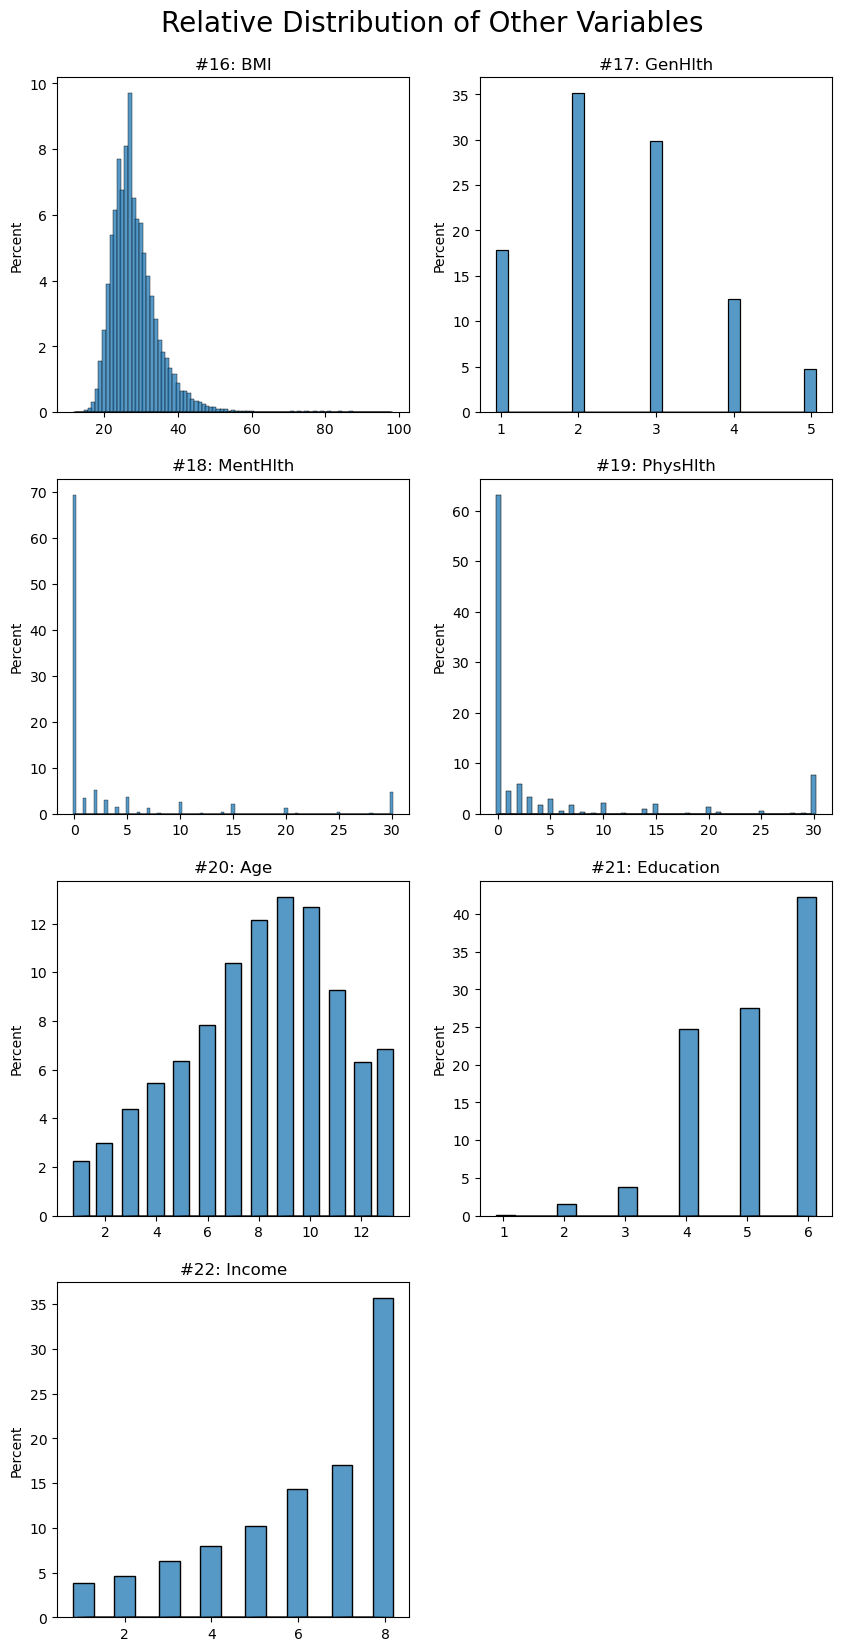

In [94]:
# setting up multi plot
fig = plt.figure(figsize=(10,20))
plt.suptitle('Relative Distribution of Other Variables', 
             va='bottom', y=0.9, fontsize=20)
fig_count = 1

for att in other_features:
    plt.subplot(4, 2, fig_count)
    sns.histplot(x=att , data=merged_data, stat="percent", shrink=5)
    plt.xlabel('')

    plt.title("#"+str(fig_count+15)+": "+att)

    fig_count += 1
plt.show()

[here]

#### Correlation Heatmap

<Axes: >

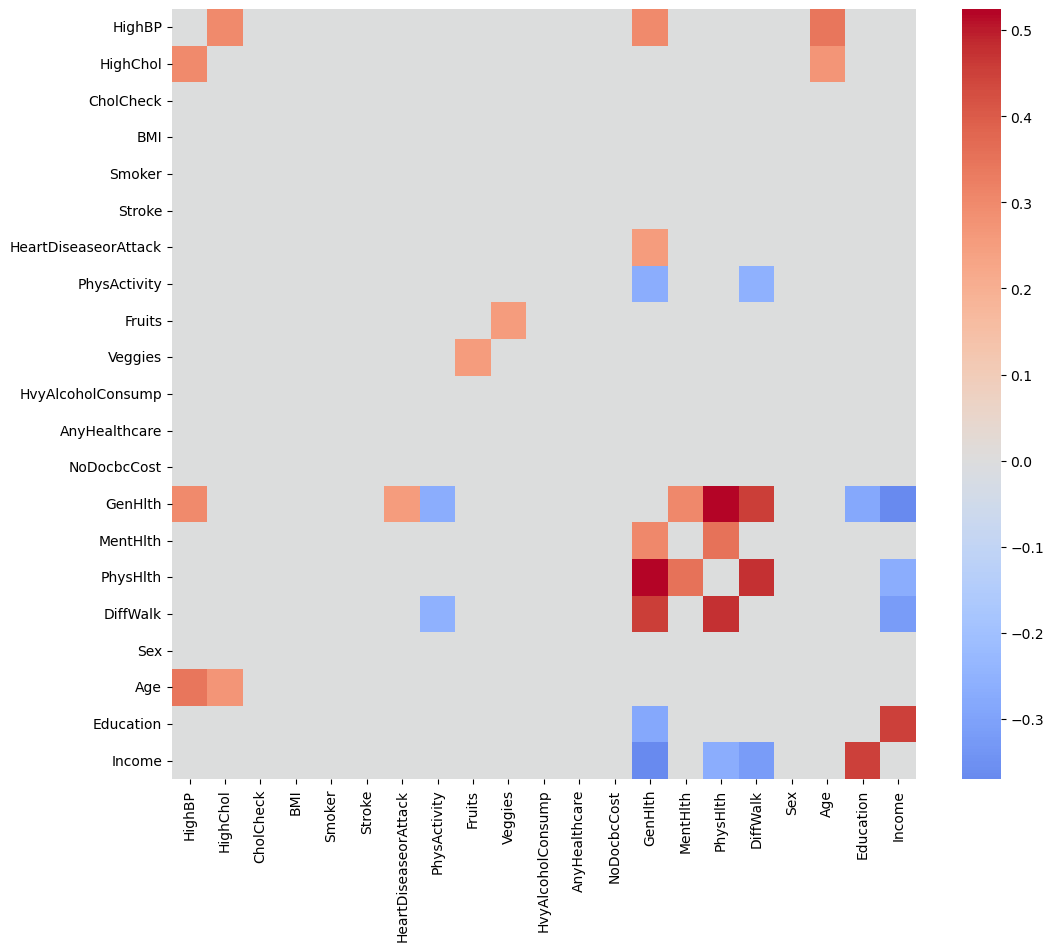

In [95]:
# creating a heatmap to show correlation between the features
plt.figure(figsize=(12,10))
correlation = feature_data.corr()

# selecting the highly correlated features
hi_corr = correlation.copy()
threshold = 0.25
hi_corr[(abs(hi_corr) < threshold) | (abs(hi_corr) > 0.99)] = 0
sns.heatmap(hi_corr, annot=False, cmap='coolwarm', center=0)


# 3. Research Question, Hypotheses, and Analysis Plan

### a. Concretely, what is (are) your research question(s)? Be specific: what are the inputs, outputs, and evaluation metrics you are interested in, and why? 

> * Does diabetes prediction accuracy change across income groups?
> * Does diabetes prediction accuracy change across sex groups?
> * If there do exist differences, what are the driving factors?

#### Inputs
> * Our inputs include: HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, GenHlth, MentHlth, PhysHlth, and DiffWalk.
> * The demographic input data are Sex, Age, Education, and Income.

#### Outputs
> Our output is the binary prediction such that 1 is the patient is diagnosed with diabetes or prediabetes and 0 represents that the patient is not diabetic.

#### Evaluation metrics
> The evaluation metrics we want to use for our algorithm include assessing if the accuracy, precision, recall, and FNR is different for various income and sex groups.

### b. What are your hypotheses? e.g., do you notice any potential biases from your summary statistics? What are they, and why might these exist?

> * From the summary statistics, we observe that there are about **27% more females** than males identified in the data. 
> * Additionally, almost all participants had indicated that they had their cholesterol check in the past 5 years. There could be a bias in the dataset towards individuals that are more health conscious, have had family history of high cholesterol, and previous concerns regarding their cholesterol levels and are predisposed to a diagnosis related to their cholesterol levels. Additionally, this indicator could be associated with most of the participants having an income level of around $75,000 or more. Many of the participants in this dataset could have the financial ability to upkeep with annual check ups and take preventative cautions in regards to cholesterol levels and a potential diabetes diagnosis.

### c. What analyses are you going to run (in section 4) to test your hypotheses presented above?
> * We will be testing our hypotheses with the following models: Linear Regression, SVM, LightGBM, Naive Bayes, and Random Forest. 
> * To observe potential biases in prediction, we will utilize upsampling methods for minority groups and compare with its reciprocal model without upsampling methods employed. 





# 4. Modeling

## Model 1: X
### a. Model

In [96]:
#[insert model 1 code here]

### b. Evaluation Metrics

In [97]:
#[insert eval metrics code here]

### c. Informative Plots 

In [98]:
#[insert plot code here]

## Model 2: X
### a. Model

In [99]:
#[insert model 2 code here]

### b. Evaluation Metrics

In [100]:
#[insert eval metrics code here]

### c. Informative Plots 

In [101]:
#[insert plot code here]

## Model 3: X

### a. Model

In [102]:
#[insert model 3 code here]

### b. Evaluation Metrics

In [103]:
#[insert eval metrics code here]

### c. Informative Plots 

In [104]:
#[insert plot code here]

## Model 4: X
### a. Model

In [105]:
#[insert model 1 code here]

### b. Evaluation Metrics

In [106]:
#[insert eval metrics code here]

### c. Informative Plots 

In [107]:
#[insert plot code here]

# 5. Results

### a. Interpret the results of each model

### b. Compare the performance of your models from part 4 on the evaluation metrics you noted in section 3a

# 6. Contribution Notes


[ here ]

# 7. Sources Cited

* Behavioral Risk Factor Surveillance System (BRFSS) 2015 Codebook Report: https://www.cdc.gov/brfss/annual_data/2015/pdf/codebook15_llcp.pdf